In [36]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 构造数据集

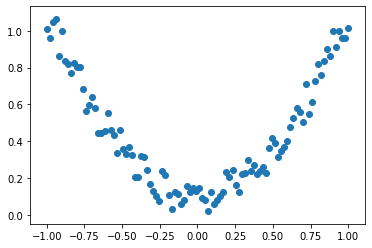

x type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
x shape: (100, 1)
y shape: (100, 1)


In [37]:
x = np.expand_dims(np.linspace(-1, 1, 100), 1).astype(np.float32)  # x data (tensor), shape=(100, 1)
y = np.power(x,2)+0.2*np.random.random(x.shape)   # noisy y data (tensor), shape=(100, 1)
 
# draw
plt.scatter(x, y)
plt.show()

print('x type:', type(x))
print('y type:', type(y))
print('x shape:', x.shape)
print('y shape:', y.shape)

### 2. 构造计算图

In [38]:
import tensorflow as tf
 
class Net():  # 继承torch-Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()   

        self.hidden_weight = tf.Variable(tf.random_uniform([n_feature, n_hidden]), dtype=tf.float32)
        self.hidden_weight_bias = tf.Variable(tf.zeros([n_hidden]), dtype=tf.float32)
        
        self.predict_weight = tf.Variable(tf.random_uniform([n_hidden, n_output]), dtype=tf.float32)
        self.predict_weight_bias = tf.Variable(tf.zeros([n_output]), dtype=tf.float32)
        
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
    
    
    def loss(self):
        hidden_out = tf.matmul(x, self.hidden_weight) + self.hidden_weight_bias
        out = tf.matmul(hidden_out, self.predict_weight) + self.predict_weight_bias
        pred_y = tf.nn.relu(out)
        
        loss = tf.reduce_mean(tf.square(pred_y-self.y))
        self.loss = loss
        return loss



In [67]:
import tensorflow as tf
saver = tf.train.Saver()

n_feature=1
n_hidden=10
n_output=1
 
hidden_weight = tf.Variable(tf.random_normal([n_feature, n_hidden], mean=0.0, stddev=0.01))
hidden_weight_bias = tf.Variable(tf.zeros([n_hidden]))

predict_weight = tf.Variable(tf.random_normal([n_hidden, n_output], mean=0.0, stddev=0.01))
predict_weight_bias = tf.Variable(tf.zeros([n_output]))

x_inputs = tf.placeholder(tf.float32)
y_inputs = tf.placeholder(tf.float32)

hidden_out = tf.matmul(x_inputs, hidden_weight) + hidden_weight_bias
hidden_out = tf.nn.relu(hidden_out) 
pred_y = tf.matmul(hidden_out, predict_weight) + predict_weight_bias

loss = tf.reduce_mean(tf.square(pred_y-y_inputs))

### 3. Session 训练模型 

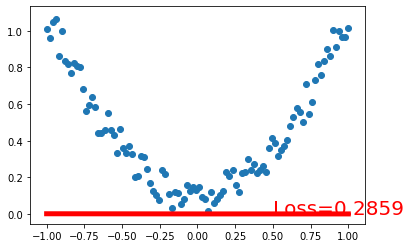

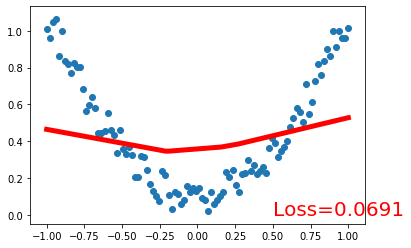

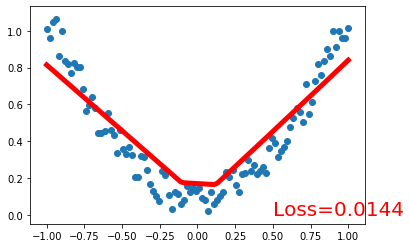

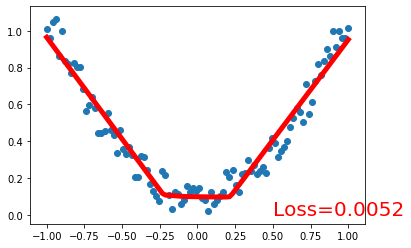

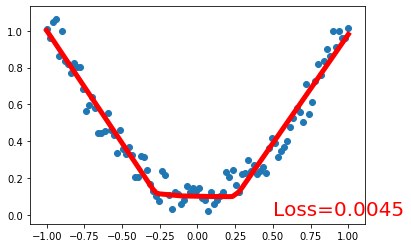

In [72]:
# optimizer
# optimizer = tf.train.GradientDescentOptimizer(0.1)
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# Train
init = tf.global_variables_initializer()  
#with tf.Session() as sess:
sess = tf.Session()  
sess.run(init)      
for step in range(200):
    _, prediction, p_loss = sess.run([train, pred_y, loss], feed_dict={x_inputs:x, y_inputs:y})

    if step % 40 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, prediction, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % p_loss, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

### 4.保存模型

In [47]:
saver.save(sess,"tf_model/model.ckpt") 

'tf_model/model.ckpt'